In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Arithmetic Operations on Images

## Goal

* Learn several arithmetic operations on images like 
    * addition, 
    * subtraction, 
    * bitwise operations 
    * etc.
* You will learn these functions : 
    * `cv2.add()`, 
    * `cv2.addWeighted()` 
    * etc.

In [2]:
# cv2.add
# cv2.addWeighted

## Image Addition

You can add two images by **OpenCV** function, `cv2.add()` or simply by numpy operation, `res = img1 + img2`. Both images should be of same depth and type, or second image can just be a scalar value.

> ## Note
>
> There is a difference between `OpenCV addition` and `Numpy addition`. 
> `OpenCV addition` is a saturated operation while `Numpy addition` is a modulo operation.

For example, consider below sample:

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
x = np.uint8([250])
y = np.uint8([10])

# 250+10 = 260 => 255
print(cv2.add(x,y))

# 250+10 = 260 % 256 = 4
print(x+y)

[[255]]
[4]


In [6]:
x = np.uint8([250])
y = np.uint8([120])

print(x+y)
print(cv2.add(x,y))

[114]
[[255]]


In [20]:
img1 = cv2.imread('/content/drive/MyDrive/학교 자료/기타/랩/pictures/numpy.png')
plt1 = cv2.resize( img1, (200, 200) )

img2 = cv2.imread('/content/drive/MyDrive/학교 자료/기타/랩/pictures/opencv.png')
plt2 = cv2.resize( img2, (200, 200) )

In [21]:
cv2.resize?

#================================

It will be more visible when you add two images. **OpenCV function** will provide a better result. So, always better stick to OpenCV functions.

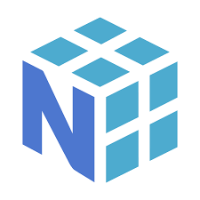

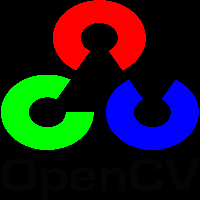

In [22]:
from google.colab.patches import cv2_imshow

cv2_imshow(plt1)
cv2_imshow(plt2)

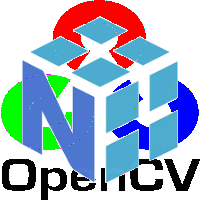

In [24]:
cv2_imshow(plt1 + plt2)

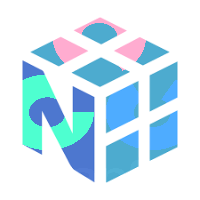

In [26]:
cv2_imshow(cv2.add(plt1, plt2))

94


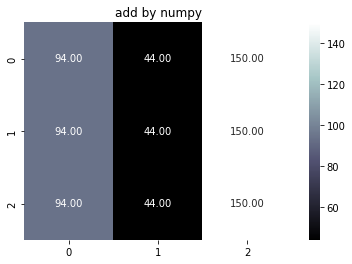

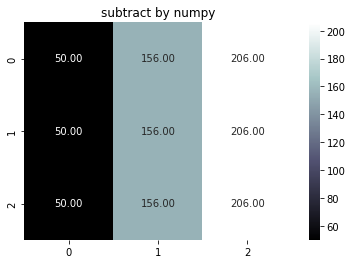

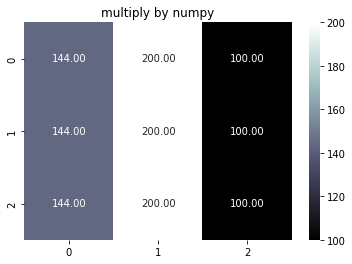

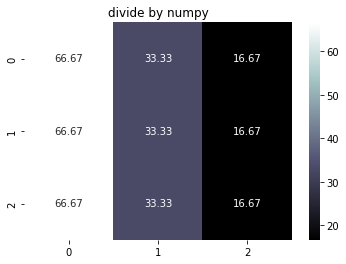

In [27]:
def show_heatmap(title,img): 
  plt.figure(title)
  plt.title(title)

  # .2f = 소숫점 뒤에 2자리까지 하겠다
  sns.heatmap(img,annot=True,fmt='.2f',cmap=plt.cm.bone)
  plt.show()

x = np.array([[200,100,50],
              [200,100,50],
              [200,100,50]],
             dtype=np.uint8)
y = np.array([[150,200,100],
              [150,200,100],
              [150,200,100]],
             dtype=np.uint8
             )

add      = x + y
subtract = x - y
multiply = x * 2
divide   = x / 3

print( (200+150)%256) # modulo

show_heatmap('add by numpy',add)
show_heatmap('subtract by numpy',subtract)
show_heatmap('multiply by numpy', multiply)
show_heatmap('divide by numpy', divide)

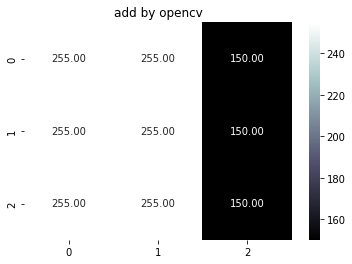

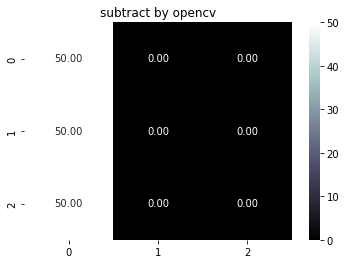

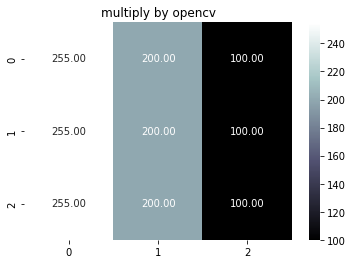

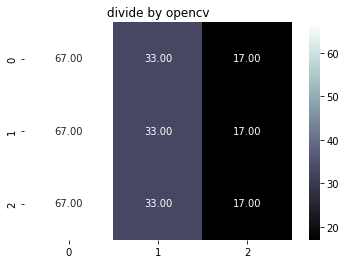

In [28]:
"""
x = np.array([[200,100,50],
              [200,100,50],
              [200,100,50]],
             dtype=np.uint8)
y = np.array([[150,200,100],
              [150,200,100],
              [150,200,100]],
             dtype=np.uint8
             )
"""

add      = cv2.add(x ,y)
subtract = cv2.subtract(x, y)
multiply = cv2.multiply(x ,2)
divide   = cv2.divide(x ,3)

show_heatmap('add by opencv',add)
show_heatmap('subtract by opencv',subtract)
show_heatmap('multiply by opencv', multiply)
show_heatmap('divide by opencv', divide)    # 200/3 = 66.66..... but in the case of opencv 200/3 = 67

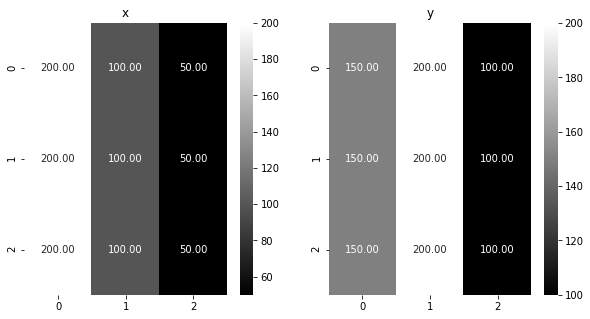

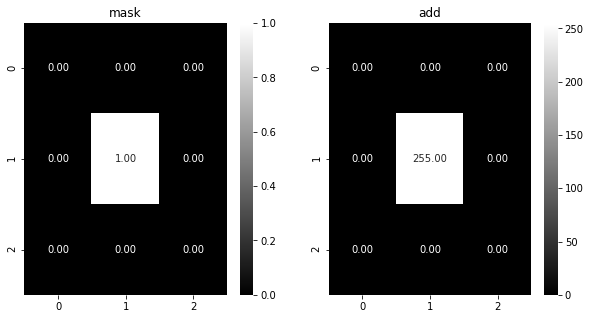

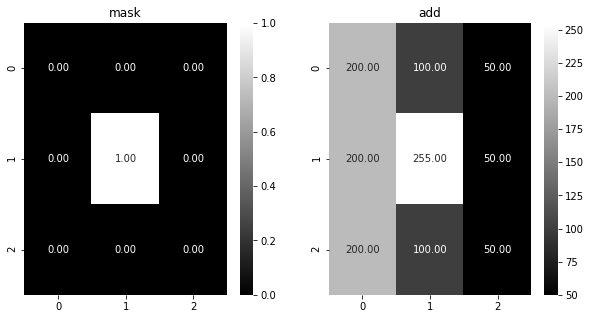

In [ ]:
def draw_subheatmap(title_0, img_0, title_1, img_1):
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  plt.gca().set_title(title_0)
  sns.heatmap(img_0,annot=True,fmt='.2f',cmap=plt.cm.gray)
  plt.subplot(122)
  plt.gca().set_title(title_1)
  sns.heatmap(img_1,annot=True, fmt='.2f', cmap=plt.cm.gray)

x = np.array([[200,100,50],
              [200,100,50],
              [200,100,50]],
             dtype=np.uint8)
y = np.array([[150,200,100],
              [150,200,100],
              [150,200,100]],
             dtype=np.uint8
             )

mask = np.zeros(shape=(3,3), dtype=np.uint8)
mask[1,1] = 1

draw_subheatmap('x',x,'y',y)

r = np.zeros(shape=(3,3), dtype=np.uint8)
cv2.add(x,y,r,mask=mask)
draw_subheatmap('mask',mask,'add',r)

cv2.add(x,y,x,mask=mask) # the result of addition will be stored to x
draw_subheatmap('mask',mask,'add',x)

## Image Blending (or $\alpha$ blending)

This is also image addtion, but different weights are given to images so that it gives a feeling of blending or trasparency. Images are added as per the equation below:

$$
g(x) = (1-\alpha) f_0 (x) + \alpha f_1 (x)
$$

By varing $\alpha$ from 0 to 1, you can perform a cool transition b/w one image to another

Here I took two images to blend them together. 
* First image is given a weight of 0.7 and 
* second image is given a weight of 0.3. 

`cv2.addWeight()` applies following equation on the image.

$$
\text{dst} = \alpha \cdot \text{img}_1 + \beta \cdot \text{img}_2 + \gamma
$$

Here $\gamma$ is taken as zero

In [31]:
import os

img1 = cv2.imread('/content/drive/MyDrive/학교 자료/기타/랩/pictures/numpy.png')
img2 = cv2.imread('/content/drive/MyDrive/학교 자료/기타/랩/pictures/opencv.png')

img1 = cv2.resize(img1, dsize=(img2.shape[1],img2.shape[0]), interpolation= cv2.INTER_AREA)
print(img1.shape)
print(img2.shape)

(1478, 1200, 3)
(1478, 1200, 3)


In [35]:
result = cv2.addWeighted(img1, 0.5, img2, 0.5, 1)

In [38]:
cv2.addWeighted?

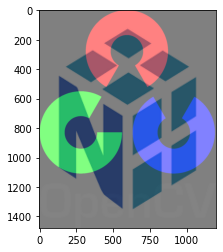

In [40]:
plt.imshow(result[:, :, ::-1])

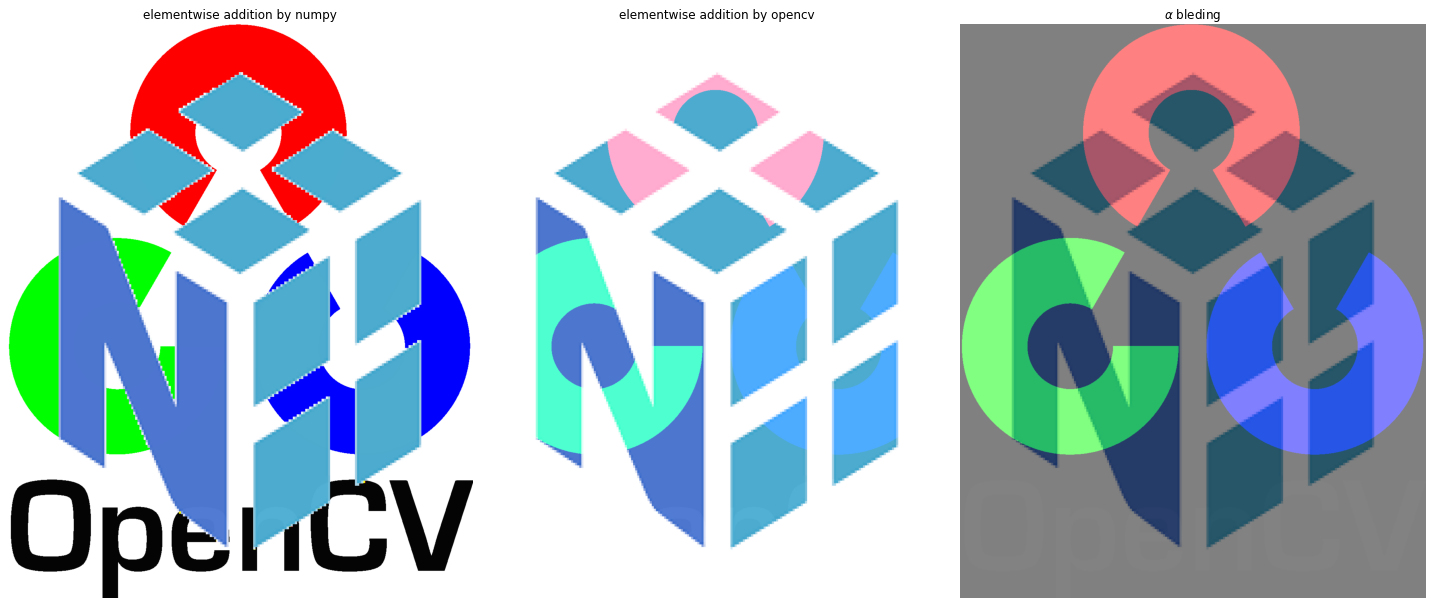

In [41]:
ret_0 = img1+img2
ret_1 = cv2.add(img1, img2)

plt.figure(figsize=(20,40))
plt.subplot(1,3,1)
plt.gca().set_title('elementwise addition by numpy')
plt.imshow(ret_0[:,:,::-1])

plt.gca().axis('off')
plt.subplot(1,3,2)
plt.gca().set_title('elementwise addition by opencv')
plt.imshow(ret_1[:,:,::-1])
plt.gca().axis('off')

plt.subplot(1,3,3)
plt.gca().set_title(r'$\alpha$ bleding')
plt.imshow(dst[:,:,::-1])
plt.gca().axis('off')

plt.tight_layout()
plt.show()

In [48]:
# interact 연습

def g(x):
  alpha = x/100
  ret = cv2.addWeighted(img1, alpha, img2, 1-alpha,0)
  plt.imshow(ret[:,:,::-1])

interact(g, x=widgets.IntSlider(min=0, max=100))

interactive(children=(IntSlider(value=0, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.g>

# face morphing

[ref. about jupyter widget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

In [44]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
  alpha = x/100
  ret = cv2.addWeighted(img1, alpha, img2, 1-alpha,0)
  plt.imshow(ret[:,:,::-1])

interact(f, x=widgets.IntSlider(min=0, max=100, step=10, value=10, continuous_update=True));

interactive(children=(IntSlider(value=10, description='x', step=10), Output()), _dom_classes=('widget-interact…

## Bitwise Operations

This includes bitwise **AND**, **OR**, **NOT** and **XOR** operations. 
* They will be highly useful while **extracting any part of the image**
* defining and working with non-rectangular ROI etc.


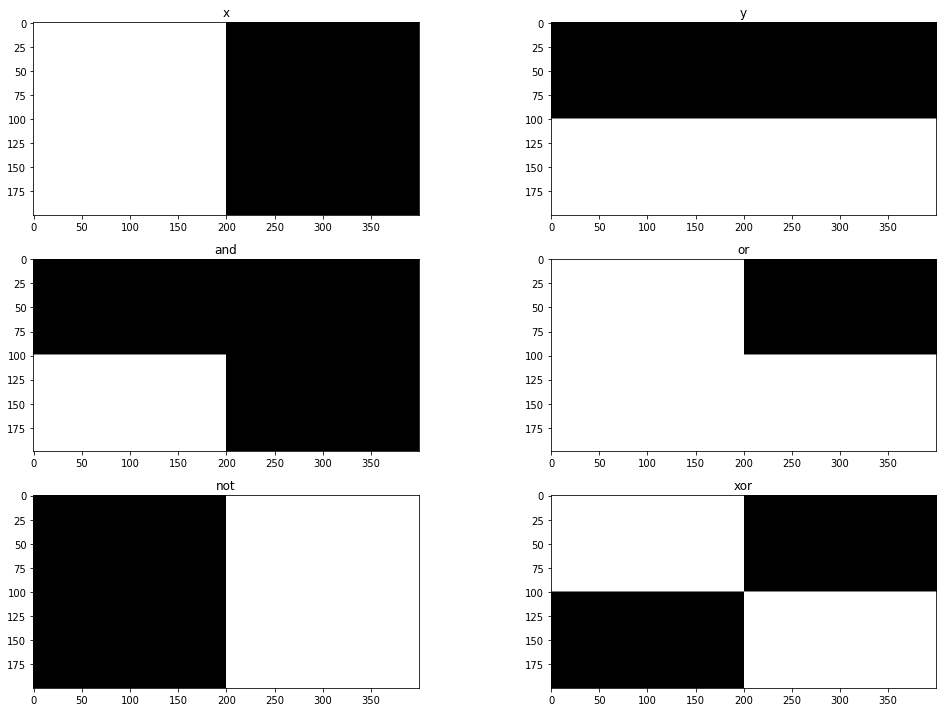

In [ ]:
img_0 = np.zeros( shape=(200,400), dtype=np.uint8)
img_1 = np.zeros( shape=(200,400), dtype=np.uint8)

img_0[:,:200] = 255
img_1[100:200,:] = 255

bit_op_and = cv2.bitwise_and(img_0,img_1)
bit_op_or  = cv2.bitwise_or (img_0,img_1)
bit_op_not = cv2.bitwise_not(img_0)
bit_op_xor = cv2.bitwise_xor(img_0,img_1)

imgs = {'x':img_0, 'y':img_1, 'and':bit_op_and, 'or':bit_op_or, 'not':bit_op_not, 'xor':bit_op_xor}
plt.figure(figsize=(15,10))
for idx, (title,img) in enumerate(imgs.items()):
  plt.subplot(3,2,idx+1)
  plt.title(title)
  plt.imshow(img, cmap=plt.cm.gray)
  #plt.axis('off')
plt.tight_layout()
plt.show()

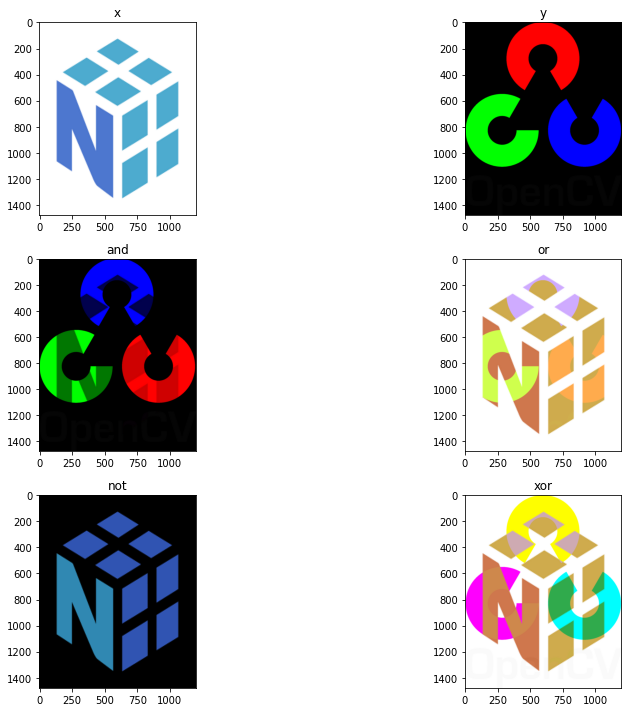

In [51]:
bit_op_and = cv2.bitwise_and(img1,img2)
bit_op_or  = cv2.bitwise_or (img1,img2)
bit_op_not = cv2.bitwise_not(img1)
bit_op_xor = cv2.bitwise_xor(img1,img2)

imgs = {'x':img1[:, :, ::-1], 'y':img2[:, :, ::-1], 'and':bit_op_and, 'or':bit_op_or, 'not':bit_op_not, 'xor':bit_op_xor}
plt.figure(figsize=(15,10))
for idx, (title,img) in enumerate(imgs.items()):
  plt.subplot(3,2,idx+1)
  plt.title(title)
  plt.imshow(img, cmap=plt.cm.gray)
  #plt.axis('off')
plt.tight_layout()
plt.show()

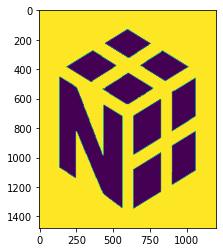

In [56]:
img3 = cv2.imread("/content/drive/MyDrive/학교 자료/기타/랩/wallpaper/2.jpg")

print(img1.shape)

_, mask  = cv2.threshold(img1[:,:,2], 100,255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.figure(figsize = (10, 10))
plt.imshow(mask)

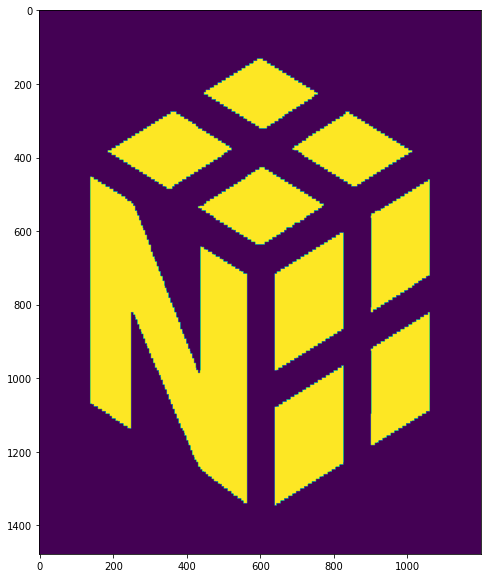

In [57]:
plt.figure(figsize = (10, 10))
plt.imshow(mask_inv)

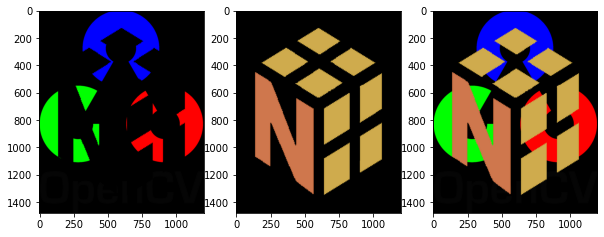

In [67]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGRA2BGR)
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

masked_fg = cv2.bitwise_and(img2, img2, mask=mask)
masked_bg = cv2.bitwise_and(roi,   roi, mask=mask_inv)
added_roi = masked_fg+masked_bg
img1[0:rows, 0:cols] = added_roi


plt.figure(figsize=(10, 10))

plt.subplot(231)
plt.imshow(masked_fg)

plt.subplot(232)
plt.imshow(masked_bg)

plt.subplot(233)
plt.imshow(img1)

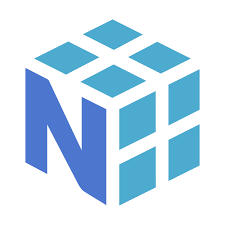

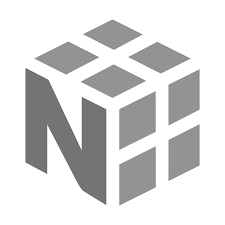

<Figure size 432x288 with 0 Axes>

In [110]:
from google.colab.patches import cv2_imshow
# Load two images : img1, img3
img1 = cv2.imread("/content/drive/MyDrive/학교 자료/기타/랩/pictures/numpy.png")
img3 = cv2.imread("/content/drive/MyDrive/학교 자료/기타/랩/wallpaper/1.jpg")

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img1.shape
roi = img3[0:rows, 0:cols]

plt.figure()
# Now create a mask of logo and create its inverse mask also
img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

cv2_imshow(img1)
cv2_imshow(img1gray)

For more understanding, display all the intermediate images in the above code, especially `img1_bg` and `img2_fg`.



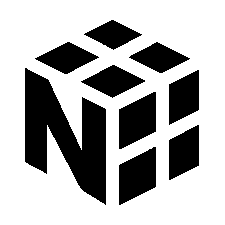

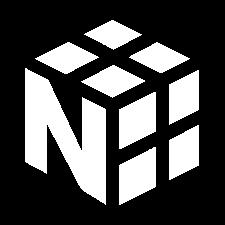

In [111]:
ret, mask = cv2.threshold(img1gray, 180,255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

cv2_imshow(mask)
cv2_imshow(mask_inv)

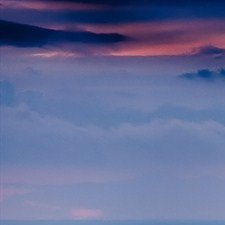

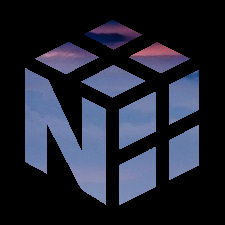

In [112]:
# Now black-out the area of logo in ROI
img0_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

cv2_imshow(roi)
cv2_imshow(img0_bg)

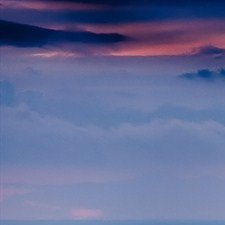

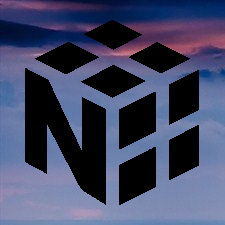

In [113]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

cv2_imshow(roi)
cv2_imshow(img1_bg)

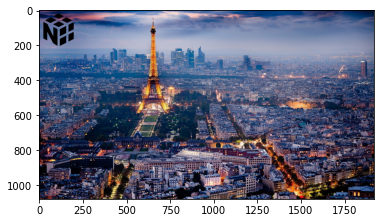

In [114]:
# Put logo in ROI and modify the main image
#roi = cv2.add(img0_bg,img1_bg)
roi = img1_bg
img3[0:rows,0:cols] = roi

plt.figure()
plt.imshow(img3[:,:,::-1])
plt.show()

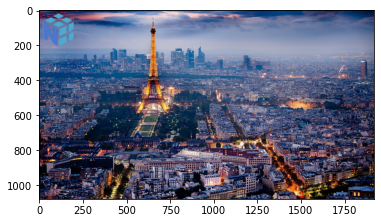

In [115]:
# Put logo in ROI and modify the main image
roi = img1 + img1_bg
img3[0:rows,0:cols] = roi

plt.figure()
plt.imshow(img3[:,:,::-1])
plt.show()